# How to Invest Money Effectively in Stocks

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

In [2]:
#list of stocks in portfolio
stocks = ['AAPL','AMZN','MSFT','NFLX']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks, data_source='yahoo', start='01/01/2010', end='14/12/2019')['Adj Close']
data.sort_index(inplace=True)
data.head(10) 

Symbols,AAPL,AMZN,MSFT,NFLX
Date,,,,
2010-01-04,26.601469,133.899994,24.360727,7.640000
2010-01-05,26.647457,134.690002,24.368599,7.358572
2010-01-06,26.223597,132.250000,24.219046,7.617143
2010-01-07,26.175119,130.000000,23.967175,7.485714
2010-01-08,26.349140,133.520004,24.132469,7.614286
2010-01-11,26.116703,130.309998,23.825497,7.604286
2010-01-12,25.819624,127.349998,23.668074,7.481429
2010-01-13,26.183823,129.110001,23.888464,7.708571
2010-01-14,26.032179,127.349998,24.368599,7.284286


# Stocks Volatility within  the Given Period by Years

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'price in $')

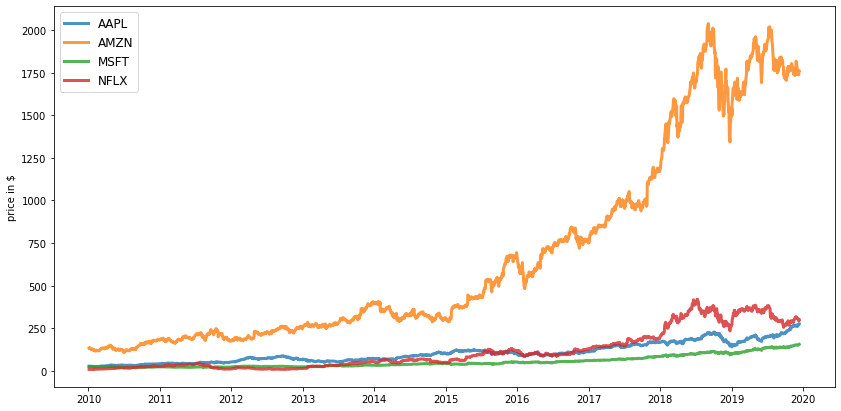

In [3]:
data.columns = [col[0:] for col in data.columns]

plt.figure(figsize=(14, 7))
for i in data.columns.values:
    plt.plot(data.index, data[i], lw=3, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

# Daily Returns of Each Stock

In [4]:
#convert daily stock prices into daily returns
returns = data.pct_change()

Text(0, 0.5, 'daily returns')

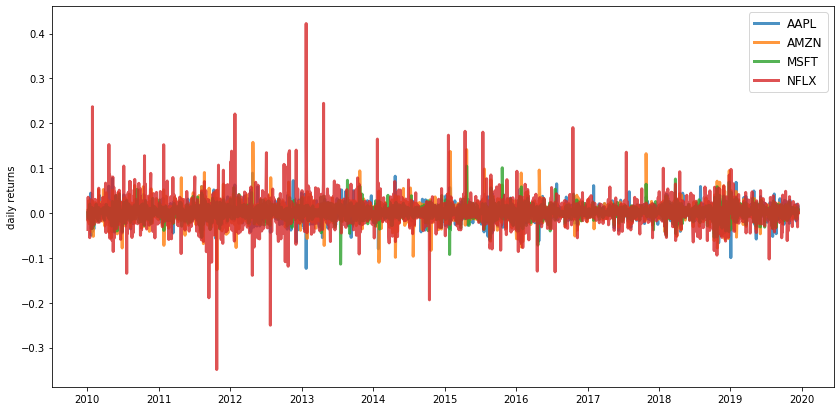

In [5]:
# plotting daily returns
plt.figure(figsize=(14, 7))
for i in returns.columns.values:
    plt.plot(returns.index, returns[i], lw=3, alpha=0.8,label=i)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [6]:
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
print (mean_daily_returns)
print(cov_matrix)

AAPL    0.001066
AMZN    0.001219
MSFT    0.000841
NFLX    0.002000
dtype: float64
          AAPL      AMZN      MSFT      NFLX
AAPL  0.000264  0.000126  0.000107  0.000113
AMZN  0.000126  0.000382  0.000137  0.000247
MSFT  0.000107  0.000137  0.000206  0.000126
NFLX  0.000113  0.000247  0.000126  0.001080


# Random Portfolios Generation with Monte Carlo Simulation

In [7]:
# by applying Monte Carlo Simulation to optimize a portfolio we create 25000 random portfolios with different weights
num_portfolios = 25000
# we have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

In [8]:
# The weight of each stock is a portion of the total investment
def yearly_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_daily_returns * weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
for i in range(num_portfolios):
    #select random weights 
    weights = np.array(np.random.random(4))
    #normalize them to be the portfolio weights
    weights /= np.sum(weights)
    
    #calculate expected return and volatility of portfolio
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) 
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

Text(0, 0.5, 'Returns')

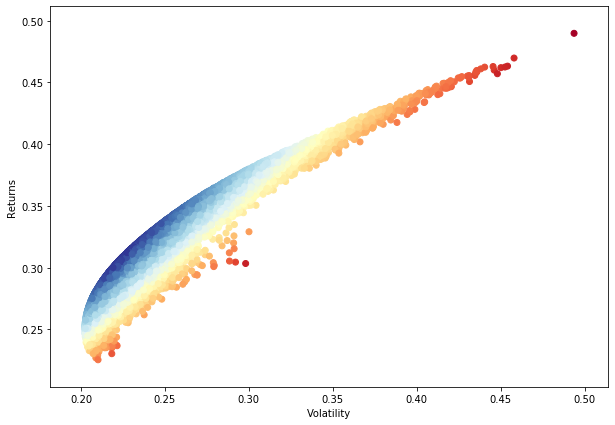

In [9]:
#plot results of Monte Carlo Simulation on portfolio weights
plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], marker='o', cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')

In [10]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['returns','standard_deviation','sharpe_ratio',stocks[0],stocks[1],stocks[2],stocks[3]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe_ratio'].idxmax()]

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['standard_deviation'].idxmin()]

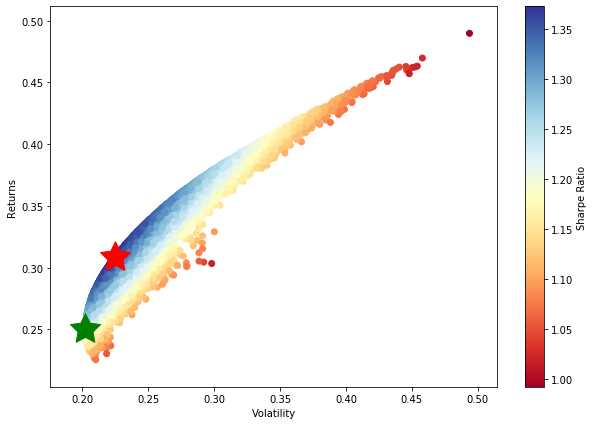

Maximum Sharpe Ratio Portfolio:

returns               0.308462
standard_deviation    0.224634
sharpe_ratio          1.373177
AAPL                  0.388888
AMZN                  0.184877
MSFT                  0.231365
NFLX                  0.194871
Name: 19810, dtype: float64
--------------------------------------------------------------------------------
Minimum Variance Portfolio:

returns               0.250298
standard_deviation    0.202315
sharpe_ratio          1.237171
AAPL                  0.321861
AMZN                  0.100321
MSFT                  0.541457
NFLX                  0.036361
Name: 493, dtype: float64


In [11]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(10, 7))
plt.scatter(results_frame.standard_deviation,results_frame.returns,c=results_frame.sharpe_ratio,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label = 'Sharpe Ratio')


#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

plt.show()
print('Maximum Sharpe Ratio Portfolio:\n')
print(max_sharpe_port)
print ("-"*80)
print('Minimum Variance Portfolio:\n')
print(min_vol_port)

# Efficient Frontier

In [12]:
# We set an objective function for minimizing risk, neg_sharpe_ratio is our objective function
def neg_sharpe_ratio(weights, mean_dail_returns, cov_matrix):
    p_ret, p_var = yearly_performance(weights, mean_daily_returns, cov_matrix)
    return -p_ret / p_var

def max_sharpe_ratio(mean_daily_returns, cov_matrix):
    num_assets = len(mean_daily_returns)
    args = (mean_daily_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # sum of weights is equal to 1
    bound = (0.0,1.0) # weights should be between 0 and 1
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [13]:
def portfolio_volatility(weights, mean_daily_returns, cov_matrix):
    return yearly_performance(weights, mean_daily_returns, cov_matrix)[0]

# Minimize Volatilty
def min_variance(mean_daily_returns, cov_matrix):
    num_assets = len(mean_daily_returns)
    args = (mean_daily_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result


In [14]:
def efficient_return(mean_daily_returns, cov_matrix, target): # efficient portfolio
    num_assets = len(mean_daily_returns)
    args = (mean_daily_returns, cov_matrix)

    def portfolio_return(weights):
        return yearly_performance(weights, mean_daily_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_daily_returns, cov_matrix, returns_range):
    efficient = []
    for ret in returns_range:
        efficient.append(efficient_return(mean_daily_returns, cov_matrix, ret))
    return efficient

In [15]:
def display_calculated_ef_with_random(mean_daily_returns, cov_matrix, num_portfolios):
    max_sharpe = max_sharpe_ratio(mean_daily_returns, cov_matrix)
    stdp, retp = yearly_performance(max_sharpe['x'], mean_daily_returns, cov_matrix)
    max_sharpe_weights = pd.DataFrame(max_sharpe.x,index=data.columns,columns=['weights'])
    max_sharpe_weights.weights = [round(i*100,2)for i in max_sharpe_weights.weights]
    max_sharpe_weights = max_sharpe_weights.T

    min_vol = min_variance(mean_daily_returns, cov_matrix)
    stdp_min, retp_min = yearly_performance(min_vol['x'], mean_daily_returns, cov_matrix)
    min_vol_weights = pd.DataFrame(min_vol.x,index=data.columns,columns=['weights'])
    min_vol_weights.weights = [round(i*100,2)for i in min_vol_weights.weights]
    min_vol_weights = min_vol_weights.T
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[1,:], results[0,:], c=results[2,:], marker='o', cmap='RdYlBu')
    plt.colorbar()
    plt.scatter(stdp,retp,marker='*',color='r',s=500, label='Maximum Sharpe Ratio')
    plt.scatter(stdp_min,retp_min,marker='*',color='g',s=500, label='Minimum Volatility')

  
    target = np.linspace(retp_min, 0.50, 50)
    efficient_portfolios = efficient_frontier(mean_daily_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='Efficient Frontier')
    plt.title('Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Yearly Volatility')
    plt.ylabel('Yearly Returns')
    plt.legend(labelspacing=0.08)
    
    
    print ("Maximum Sharpe Ratio Portfolio \n")
    print ("Yearly Return:", round(retp,2))
    print ("Yearly Volatility:", round(stdp,2))
    print ("\n")
    print (max_sharpe_weights)
    print ("-"*80)
    print ("Minimum Volatility Portfolio \n")
    print ("Yearly Return:", round(retp_min,2))
    print ("Yearly Volatility:", round(stdp_min,2))
    print ("\n")
    print (min_vol_weights)

Maximum Sharpe Ratio Portfolio 

Yearly Return: 0.5
Yearly Volatility: 0.52


         AAPL  AMZN  MSFT   NFLX
weights   0.0   0.0   0.0  100.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio 

Yearly Return: 0.25
Yearly Volatility: 0.2


          AAPL   AMZN   MSFT  NFLX
weights  34.16  10.52  52.35  2.96


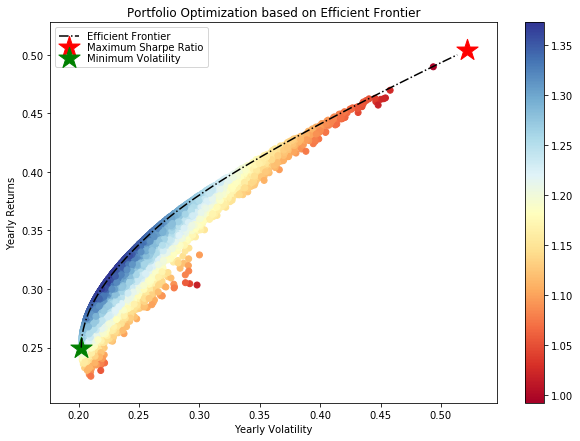

In [16]:
display_calculated_ef_with_random(mean_daily_returns, cov_matrix, num_portfolios)

In [17]:
def display_ef_with_selected(mean_daily_returns, cov_matrix):
    max_sharpe = max_sharpe_ratio(mean_daily_returns, cov_matrix)
    stdp, retp = yearly_performance(max_sharpe['x'], mean_daily_returns, cov_matrix)
    max_sharpe_weights = pd.DataFrame(max_sharpe.x,index=data.columns,columns=['weights'])
    max_sharpe_weights.weights = [round(i*100,2)for i in max_sharpe_weights.weights]
    max_sharpe_weights = max_sharpe_weights.T

    min_vol = min_variance(mean_daily_returns, cov_matrix)
    stdp_min, retp_min = yearly_performance(min_vol['x'], mean_daily_returns, cov_matrix)
    min_vol_weights = pd.DataFrame(min_vol.x,index=data.columns,columns=['weights'])
    min_vol_weights.weights = [round(i*100,2)for i in min_vol_weights.weights]
    min_vol_weights = min_vol_weights.T
    
    yearly_vol = np.std(returns) * np.sqrt(252)
    yearly_return = mean_daily_returns * 252
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(yearly_vol,yearly_return,marker='o',s=200)

    for i, txt in enumerate(data.columns):
        ax.annotate(txt, (yearly_vol[i],yearly_return[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(stdp,retp,marker='*',color='r',s=500, label='Maximum Sharpe Ratio')
    ax.scatter(stdp_min,retp_min,marker='*',color='g',s=500, label='Minimum Volatility')

    target = np.linspace(retp_min, 0.50, 50)
    efficient_portfolios = efficient_frontier(mean_daily_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='Efficient Frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('Yearl Volatility')
    ax.set_ylabel('Yearly Returns')
    ax.legend(labelspacing=0.8)
    
    
    print ("Maximum Sharpe Ratio Portfolio \n")
    print ("Yearly Return:", round(retp,2))
    print ("Yearly Volatility:", round(stdp,2))
    print ("\n")
    print (max_sharpe_weights)
    print ("-"*80)
    print ("Minimum Volatility Portfolio \n")
    print ("Yearly Return:", round(retp_min,2))
    print ("Yearly Volatility:", round(stdp_min,2))
    print ("\n")
    print (min_vol_weights)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(data.columns):
        print (txt,":","Yearly Return",round(yearly_return[i],2),", Yearly Volatility:",round(yearly_vol[i],2))
    

Maximum Sharpe Ratio Portfolio 

Yearly Return: 0.5
Yearly Volatility: 0.52


         AAPL  AMZN  MSFT   NFLX
weights   0.0   0.0   0.0  100.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio 

Yearly Return: 0.25
Yearly Volatility: 0.2


          AAPL   AMZN   MSFT  NFLX
weights  34.16  10.52  52.35  2.96
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AAPL : Yearly Return 0.27 , Yearly Volatility: 0.26
AMZN : Yearly Return 0.31 , Yearly Volatility: 0.31
MSFT : Yearly Return 0.21 , Yearly Volatility: 0.23
NFLX : Yearly Return 0.5 , Yearly Volatility: 0.52


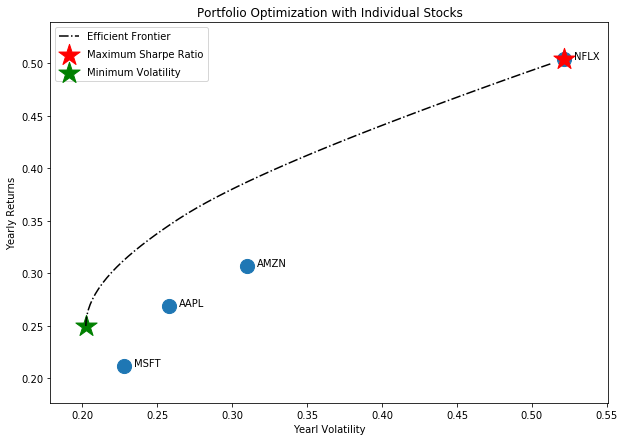

In [18]:
display_ef_with_selected(mean_daily_returns, cov_matrix)